# COFFEE


The connection with coffee is personal. My great-grandparents used to be owners of coffee farms in Colombia. Going back to the late 1800s and early 1900s, we have always been a coffee drinking and coffee producing nation. My father and I have always considered opening a coffeeshop to continue watering our roots as coffeemakers. In consideration of this, I have always been curious - what is the best coffee in the world? If we were to have a coffeeshop, what coffees would we want? We would probably want an assortment of coffees - not just being limited to Colombian (however biased we may be). We would want to have a truly diverse array of coffees. Coffee from all around the world. What is the best coffee from each continent? Which country produces the best coffee? What processing method produces the best tasting coffee? These are the questions I set out to answer in this project.

Coffee is the lifeblood of people all around the world. From the working class to upper class, this beautiful bean powers our days. Indeed, coffee may be the reason the world goes 'round. In our days as coffee drinkers, we may have had our fair share of delicious and disgusting coffees. Life is short - we should try to focus on those coffees which are best. Let us find out - which country, according to an average of experts, produces the best coffee? Let us find out.

I began searching for coffee-related datasets on Kaggle to see what I could find. Amazingly, I found the perfect dataset. This is the "Coffee Quality Data (CQI May-2023)" dataset from the Coffee Quality Institute. (https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi)

The Coffee Quality Institute (henceforth, CQI)is a non-profit organization working internationally to improve the quality of coffee and the lives of people who produce it.^1 (https://www.coffeeinstitute.org/)

This dataset is from a database that CQI maintains as a resource for coffee professionals and enthusiasts who are interseted in learning about coffee quality and sustainability.

This dataset has an array of 10 different sensory evaluations (aroma, flavor, aftertaste, etc). For our purposes, we will use the addition of all these - Total Cup Points.

The dataset also has the Country of Origin, Region, Farm Name, Altitude, and Processing Method. We will be focusing on Country of Origin, Altitude, and Processing Method for these purposes.

### TABLE OF CONTENTS

1. Objective
2. Summary
3. Methods
4. Analysis
5. Conclusion

Questions I had and what did I discover?

### OBJECTIVE
In this project, I aim to investigate how geographic origin and processing methods affect the quality of coffee, as determined by Total Cup Points. Specifically, I will assess:

1. **Global Coffee Quality** : A country by country, continent by continent, and in specific cases - region by region analysis of coffee farms with the highest rating.

2. **Processing Method Quality** : A brief analysis into the different ways of processing coffee beans, including factors such as cost, effieciency, and taste as measured by Total Cup Points.

By presenting these findings, I hope to bring more clarity into more informed coffee purchasing decisions for the coffee enthusiast, the barista, or coffeeshop owner.

### SUMMARY
The top five countries for coffee quality are:

1. Ethiopia
2. Tanzania
3. Taiwan
4. Guatemala
5. Madagascar

Considering that the coffee bean originates in Ethiopia (https://www.britannica.com/topic/history-of-coffee), it is not surprising that the best quality originates from that region. Tanzania as a close neighboring country makes sense as well.

The top coffees from each continent are as follows:

- **North America** : Guatemala
- **South America**: Colombia
- **Africa** : Ethiopia
- **Asia** : Taiwan
- **Oceania** : Hawaii

Considering the latitudes of these countries respective to their continents (largely in the Bean Belt (https://elevencoffees.com/the-coffee-bean-belt-what-is-it-and-why-is-it-important/), they are conducive to the highest quality cup of coffee.

Further investigation to follow in the notebook.

### METHODS
The data was analyzed using boxplots, means, ANOVA tables, and correlation matrices.

- **Boxplots**:Boxplots help to visualize the differences between the different continents, countries, and processing methods. Just how much better is an Ethiopian coffee than a Colombian? Are there any outliers?
- **Sorted Means**: Sorting the means gives a quick and easy way to see what are the top countries and processing methods for coffee. 
- **ANOVA Tables**: The tables help to see whether the differences in means are statistically significant.
- **Correlation Matrices**: Additional analysis to see any interesting relationships.

In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('df_arabica_clean.csv', index_col=1) #opens the file

In [49]:
df.head()

,Unnamed: 0,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
ID,,,,,,,,,,,,,,,,,,,,,
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


Data Cleaning.

In [50]:
columns_to_drop = ['Unnamed: 0', 'Company', 'Owner', 'Producer', 'In-Country Partner', 'Lot Number', 'Quakers', 'Category One Defects', 'Mill', 'ICO Number', 'Number of Bags', 'Bag Weight', 'Harvest Year', 'Grading Date', 'Status', 'Expiration', 'Certification Body', 'Certification Address', 'Certification Contact']
df = df.drop(columns_to_drop, axis=1)
df = df.dropna()
df

,Country of Origin,Farm Name,Altitude,Region,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,...,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Color,Category Two Defects
ID,,,,,,,,,,,,,,,,,,,,,
0,Colombia,Finca El Paraiso,1700-1930,"Piendamo,Cauca",Castillo,Double Anaerobic Washed,8.58,8.50,8.42,8.58,...,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,green,3
1,Taiwan,Royal Bean Geisha Estate,1200,Chiayi,Gesha,Washed / Wet,8.50,8.50,7.92,8.00,...,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,blue-green,0
2,Laos,OKLAO coffee farms,1300,Laos Borofen Plateau,Java,Semi Washed,8.33,8.42,8.08,8.17,...,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,yellowish,2
3,Costa Rica,La Cumbre,1900,"Los Santos,Tarrazu",Gesha,Washed / Wet,8.08,8.17,8.17,8.25,...,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,green,0
4,Colombia,Finca Santuario,1850-2100,"Popayan,Cauca",Red Bourbon,"Honey,Mossto",8.33,8.33,8.08,8.25,...,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,yellow-green,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Brazil,Fazenda Conquista,950,Sul de Minas,Mundo Novo,Natural / Dry,7.17,7.17,6.92,7.17,...,7.17,10.0,10.0,10.0,7.08,0.0,80.08,11.4,green,4
203,Nicaragua,Finca San Felipe,1200,Matagalpa,SHG,Natural / Dry,7.33,7.08,6.75,7.17,...,7.17,10.0,10.0,10.0,7.08,0.0,80.00,10.4,green,12
204,Laos,-,1300,Bolaven Plateau,Catimor,Washed / Wet,7.25,7.17,7.08,7.00,...,7.08,10.0,10.0,10.0,7.00,0.0,79.67,11.6,green,11


In [105]:
df[df['Altitude'] == '1200~1600']

,Country of Origin,Farm Name,Altitude,Region,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,...,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Color,Category Two Defects
ID,,,,,,,,,,,,,,,,,,,,,
180,Guatemala,MULTIPLE SMALLHOLDER FARMS,1200~1600,Antigua,Caturra,Washed / Wet,7.33,7.42,7.33,7.42,...,7.42,10.0,10.0,10.0,7.42,0.0,81.92,10.3,greenish,1


In [106]:
df = df.drop(180) 

In [107]:
for index, altitude in df['Altitude'].items():
    if isinstance(altitude, str) and '-' in altitude:
        new_altitude = altitude.replace(' ', '').split('-')
        new_altitude = sum(int(k) for k in new_altitude)/len(new_altitude)
        df.at[index, 'Altitude'] = new_altitude
    elif isinstance(altitude, str):
        new_altitude = float(altitude)
        df.at[index, 'Altitude'] = new_altitude

In [109]:
df.head()

,Country of Origin,Farm Name,Altitude,Region,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,...,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Color,Category Two Defects
ID,,,,,,,,,,,,,,,,,,,,,
0,Colombia,Finca El Paraiso,1815.0,"Piendamo,Cauca",Castillo,Double Anaerobic Washed,8.58,8.50,8.42,8.58,...,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,green,3
1,Taiwan,Royal Bean Geisha Estate,1200.0,Chiayi,Gesha,Washed / Wet,8.50,8.50,7.92,8.00,...,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,blue-green,0
2,Laos,OKLAO coffee farms,1300.0,Laos Borofen Plateau,Java,Semi Washed,8.33,8.42,8.08,8.17,...,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,yellowish,2
3,Costa Rica,La Cumbre,1900.0,"Los Santos,Tarrazu",Gesha,Washed / Wet,8.08,8.17,8.17,8.25,...,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,green,0
4,Colombia,Finca Santuario,1975.0,"Popayan,Cauca",Red Bourbon,"Honey,Mossto",8.33,8.33,8.08,8.25,...,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,yellow-green,2


In [121]:
correlation = df['Altitude'].corr(df['Total Cup Points'])

AttributeError: 'float' object has no attribute 'shape'

What are the coffee producing countries according to this database?

In [18]:
i = 1
for country in df['Country of Origin'].unique():
    print(str(i) + '. ' + country)
    i += 1

1. Colombia
2. Taiwan
3. Laos
4. Costa Rica
5. Guatemala
6. Tanzania, United Republic Of
7. Ethiopia
8. Thailand
9. Brazil
10. United States (Hawaii)
11. Kenya
12. Uganda
13. Indonesia
14. Peru
15. Panama
16. Nicaragua
17. Vietnam
18. Honduras
19. El Salvador
20. Madagascar
21. Mexico
22. Myanmar


We have 22 countries from 5 continents. Quite some diveristy.

### South America

Colombia

Brazil

Peru

### North America

Costa Rica

Guatemala

Panama

Nicaragua

Honduras

El Salvador

Mexico
    

### Asia

Taiwan

Laos

Thailand

Vietnam

Indonesia

Myanmar

### Africa

Tanzania, United Republic Of

Ethiopia

Kenya

Uganda

Madagascar

### Oceania
Hawaii (United States)*

*I have included Hawaii in Oceania as it is geographically in this region, even though it is politically part of North America

Adding in an additional column for continents.

In [19]:
country_to_continent = {
    'Colombia': 'South America',
    'Taiwan': 'Asia',
    'Laos': 'Asia',
    'Costa Rica': 'North America',
    'Guatemala': 'North America',
    'Tanzania, United Republic Of': 'Africa',
    'Ethiopia': 'Africa',
    'Thailand': 'Asia',
    'Brazil': 'South America',
    'United States (Hawaii)': 'Oceania',
    'Kenya': 'Africa',
    'Uganda': 'Africa',
    'Indonesia': 'Asia',
    'Peru': 'South America',
    'Panama': 'North America',
    'Nicaragua': 'North America',
    'Vietnam': 'Asia',
    'Honduras': 'North America',
    'El Salvador': 'North America',
    'Madagascar': 'Africa',
    'Mexico': 'North America',
    'Myanmar': 'Asia'
}

In [20]:
df['Continent'] = df['Country of Origin'].map(country_to_continent)

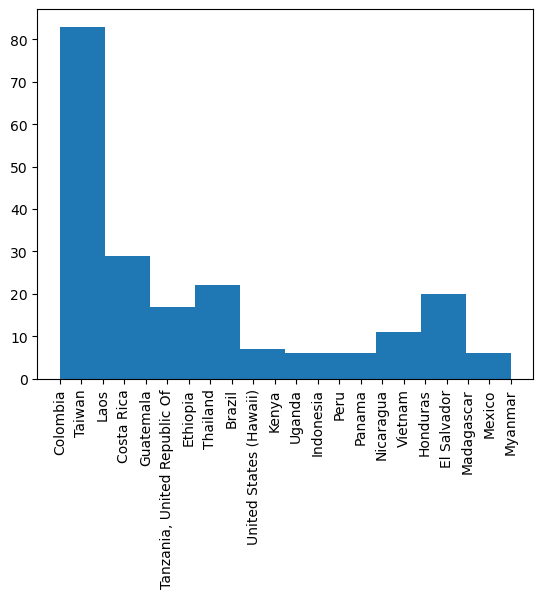

In [38]:
plt.hist(df['Country of Origin'])
plt.xticks(rotation=90, fontsize = 10)
plt.show()

In this dataset, Colombia has the highest proportion of coffee farms in the world. This is interesting because globally, Brazil is the top producer of coffee. A testament to Colombian coffee culture.

## ANALYSIS

### Breakdown by Continent

In [23]:
df.groupby('Continent').mean('Overall')['Total Cup Points'].sort_values(ascending=False)

Continent
Africa           84.626087
Asia             83.997500
Oceania          83.650000
North America    83.306290
South America    83.085758
Name: Total Cup Points, dtype: float64

Below a boxplot of coffee quality by continent.

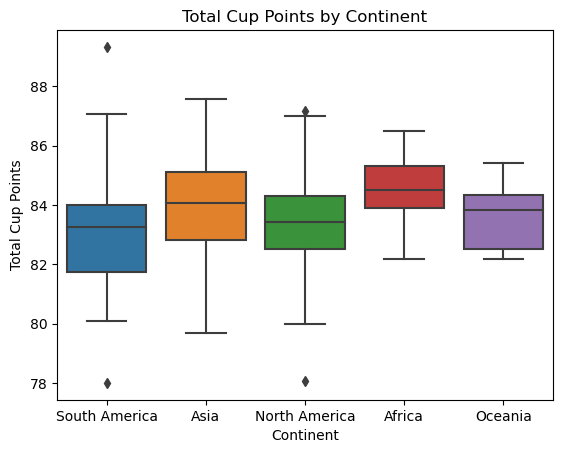

In [25]:
sns.boxplot(x='Continent', y='Total Cup Points', data=df)
plt.title('Total Cup Points by Continent')
plt.show()

Here we see that there are a few outliers for the continents.

In the data set, the single best coffee producing farm in the world is in South America - that giant outlier seen here. However, we see that the top continent overall is Africa, likely due its origins as the coffee bean originator.

Other interesting notes are that South America simultaneously has the top coffee and close the worst coffee. The country with the worst coffee is Brazil. The data set suggests that it is a decaffeinated coffee using a semi-washed method. It is certainly an outlier as the other semi-washed coffees have a very high rating.

### Breakdown by Country

In [26]:
df.groupby('Country of Origin').mean('Overall')['Total Cup Points'].sort_values(ascending=False)

Country of Origin
Ethiopia                        84.960909
Tanzania, United Republic Of    84.735000
Taiwan                          84.350328
Guatemala                       84.301429
Madagascar                      84.250000
Uganda                          83.916667
Colombia                        83.877368
Costa Rica                      83.740000
Kenya                           83.710000
Indonesia                       83.693333
Myanmar                         83.670000
United States (Hawaii)          83.650000
Panama                          83.625000
Laos                            83.390000
Honduras                        83.282308
Vietnam                         82.892500
Thailand                        82.827500
Mexico                          82.710000
Peru                            82.332500
Nicaragua                       81.892857
Brazil                          81.883000
El Salvador                     81.532857
Name: Total Cup Points, dtype: float64

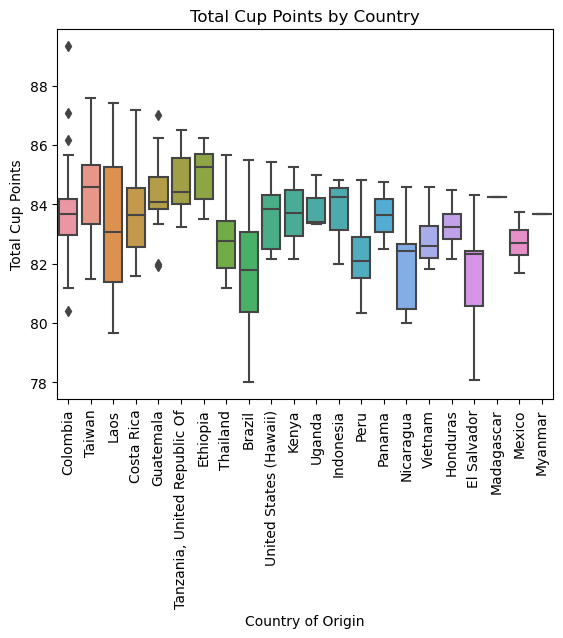

In [27]:
sns.boxplot(x='Country of Origin', y='Total Cup Points', data=df)
plt. title('Total Cup Points by Country')
plt.xticks(rotation=90, fontsize = 10)  # Rotates the labels 45 degrees
plt.show()

We see that the highest rated country by average is Ethiopia. However, this box plot shows that there are many other countries with individual coffee producing farms that far outrank it. These countries are: Colombia, Taiwan, Laos, Costa Rica, and Guatemala.

What processing methods did these top 5 farms have?

1. **Finca El Paraiso, Colombia**: Double Anaerobic
2. **Royal Bean Geisha Estate, Taiwan**: Washed/Wet
3. **OKLAO coffee farms, Laos**: Semi-Washed
4. **La Cumbre, Costa Rica**: Washed/Wet
5. **La Colina!, Guatemala**: Washed/Wet

It is noteworthy to mention that Finca El Paraiso is a world-leader in innovation for coffee production (https://www.thecoffeequest.com/el-paraiso-cauca/). They are pioneers of the Double Anaerobic processing method. It is intensive and their coffee sells for $29/lb. However, it yields an astounding cup of coffee. 

In [28]:
model = ols('Q("Total Cup Points") ~ C(Continent)', data=df).fit()

In [29]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                  sum_sq     df         F    PR(>F)
C(Continent)   49.224889    4.0  4.379517  0.002038
Residual      567.609776  202.0       NaN       NaN


In [30]:
model2 = ols('Q("Total Cup Points") ~ C(Q("Country of Origin"))', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print(anova_table2)

                               sum_sq     df         F    PR(>F)
C(Q("Country of Origin"))  172.831720   21.0  3.429178  0.000003
Residual                   444.002945  185.0       NaN       NaN


In [87]:
model3 = ols('Q("Total Cup Points") ~ C(Altitude)', data=df).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
print(anova_table3)

                 sum_sq     df         F    PR(>F)
C(Altitude)  290.494771   91.0  1.136226  0.263462
Residual     292.190035  104.0       NaN       NaN


In [114]:
df.iloc[180]

Country of Origin                             Thailand
Farm Name                                      Doi Lan
Altitude                                        1400.0
Region                                      Chiang Rai
Variety                 Typica Bourbon Caturra Catimor
Processing Method                        Natural / Dry
Aroma                                             7.42
Flavor                                            7.25
Aftertaste                                        7.33
Acidity                                           7.42
Body                                              7.33
Balance                                           7.33
Uniformity                                        10.0
Clean Cup                                         10.0
Sweetness                                         10.0
Overall                                           7.25
Defects                                            0.0
Total Cup Points                                 81.33
Moisture P

In [127]:
correlation = df['Altitude'].corr(df['Total Cup Points'])

AttributeError: 'float' object has no attribute 'shape'

In [126]:
print(type(df['Total Cup Points']))

<class 'pandas.core.series.Series'>


The ANOVA table shows that the differences in average are statistically significant.

### The Best Coffee From Each Continent

#### Africa
Ethiopia
#### Asia 
Taiwan
#### South America 
Colombia
#### North America 
Guatemala
#### Oceania
Hawaii

Now, which processing method yields the best results?

In [32]:
df.groupby('Processing Method').mean('Overall')['Total Cup Points'].sort_values(ascending=False)

Processing Method
Double Anaerobic Washed                 89.330000
Semi Washed                             87.420000
Honey,Mossto                            87.080000
Double Carbonic Maceration / Natural    84.750000
Wet Hulling                             84.250000
Natural / Dry                           83.700435
Washed / Wet                            83.645726
Pulped natural / honey                  83.552000
Anaerobico 1000h                        83.250000
SEMI-LAVADO                             78.000000
Name: Total Cup Points, dtype: float64

In [33]:
model3 = ols('Q("Total Cup Points") ~ C(Q("Processing Method"))', data=df).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
print(anova_table3)

                               sum_sq     df         F    PR(>F)
C(Q("Processing Method"))   91.945456    9.0  3.790956  0.000202
Residual                   517.416426  192.0       NaN       NaN


The differences are statistically significant.

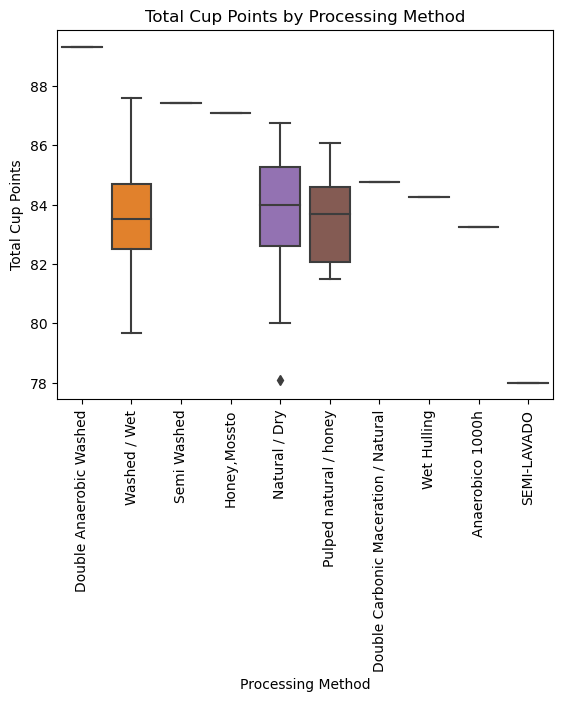

In [34]:
sns.boxplot(x='Processing Method', y='Total Cup Points', data=df)
plt.title('Total Cup Points by Processing Method')
plt.xticks(rotation=90, fontsize = 10)
plt.show()

In [111]:
matrix = df.corr()

/var/folders/63/64hr9td107z64fpxv0p8nbr80000gn/T/ipykernel_5699/1464157473.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


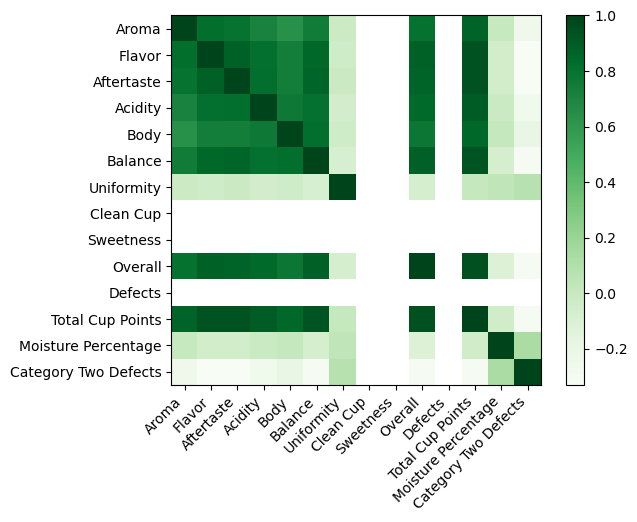

In [41]:
plt.imshow(matrix, cmap='Greens')
variables = []
plt.colorbar()
for i in matrix.columns:
    variables.append(i)
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)
plt.show()

We can see that there is quite some variation here. 

In [37]:
df.groupby('Processing Method').size() # go deeper, pull from external sources 

Processing Method
Anaerobico 1000h                          1
Double Anaerobic Washed                   1
Double Carbonic Maceration / Natural      1
Honey,Mossto                              1
Natural / Dry                            46
Pulped natural / honey                   25
SEMI-LAVADO                               1
Semi Washed                               1
Washed / Wet                            124
Wet Hulling                               1
dtype: int64

## CONCLUSION

We note that Ethiopia, on average, has the best coffee in the world. This could be a good mark for consumers that they can purchase Ethiopian coffee and be sure that it will be a good cup of coffee.

For the coffee shop owner and for coffee-producing farms, although the processing methods are important, they do not play as large a factor. The different, most popular processing methods produce different profile results, but are all within one cup point average of each other.

Coffee-producing farms should investigate further into experimental methods of coffee processing methods. The data is scant here, but newer methods suggest an exceptionally better cup of coffee. 

Further investigation that would be interesting would include the effect of altitude on the taste of coffee. 